In [1]:
#importacao de bibliotecas
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.alert import Alert
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from datetime import date
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep
import time
import datetime
import os
import pandas as pd
import numpy as np
import re
import time
import benford as bf
from bs4 import BeautifulSoup
from tqdm import tqdm

In [2]:
#lista que será passada na função para retirar os Ids dos seguidores
lista_seguidores = []

In [3]:
#lista que receberá a quantidade de cada seguidor conforme a lista de seguidores
numero_seguidores = []

In [4]:
def busca_seguidores(influencer, lista_seguidores):
    from selenium import webdriver
    from selenium.webdriver.common.keys import Keys
    from webdriver_manager.chrome import ChromeDriverManager
    import time
    import benford as bf
    from bs4 import BeautifulSoup
    #entrada na conta do influencer, e verificação da quantidade de seguidores dele.
    #abrindo webdriver
    driver = webdriver.Chrome()
    #abrindo site do instagram
    driver.get("http://www.instagram.com")
    #selecionando inputs para insercao de dados, comando de espera
    username = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='username']")))
    password = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='password']")))

    #login e senha do perfil de acesso
    with open('instagram-tokens.txt', 'r') as tfile:
        yourusername = tfile.readline().strip('\n')
        yourpassword = tfile.readline().strip('\n')

    #enviando dados para selenium
    username.clear()
    username.send_keys(yourusername)
    password.clear()
    password.send_keys(yourpassword)

    #clicando no botão para enfim acessar perfil
    button = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()
    time.sleep(5)
    driver.get("http://www.instagram.com")
    button = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[class='aOOlW   HoLwm ']"))).click()

    #habemus login
    driver.get('http://www.instagram.com/%s' %influencer)
    sleep(2) 
    page = "followers"
    driver.find_element_by_xpath('//a[contains(@href, "%s")]' % page).click()
    seguidores_influencer = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')
    total_seguidores = (int(re.sub(r'[^\w\s]','',seguidores_influencer.get_attribute('title'))))
    sleep(2)
    print('O total de seguidores dele é de %s' %total_seguidores)
    sleep(3)   
    #irá rolar a lista de seguidores até o fim, liberando todas as tags com os perfis
    botao = int(total_seguidores/2)
    for i in range(botao):
        driver.find_element_by_tag_name('html').send_keys(Keys.PAGE_DOWN*100)
    #com as tagas <a> liberadas após rolagem, código retira todos os nomes de perfil, e insere em uma lista
    page = driver.page_source
    soup = BeautifulSoup(page)
    #soup.find_all('a')
    lista_seguidores = [i.text for i in soup.find_all('a') if i.text != ""][16:]

In [5]:
#funcao passa em cada perfil da lista, e retira os dados de seus seguidores, adicionando a uma lista com os numeros.
#as duas entradas são a lista de seguidores retiradas anteriormente, e uma nova lista para receber os novos dados.
def dados_benford(lista_seguidores,numero_seguidores):
    from selenium import webdriver
    from selenium.webdriver.common.keys import Keys
    from webdriver_manager.chrome import ChromeDriverManager
    import time
    import benford as bf
    from bs4 import BeautifulSoup
    from tqdm import tqdm

    #driver = webdriver.Chrome()
    page = "followers"
    pause = 1
    number_list = 0    
    for i in lista_seguidores:
        if (number_list/50 == pause):
            #range de tempo aleatório
            sleep(600)
            pause +=1
            try:
                driver.get(f'http://www.instagram.com/{i}')
                seguidores_influencer = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')
                total_seguidores = (int(re.sub(r'[^\w\s]','',seguidores_influencer.get_attribute('title'))))
                numero_seguidores.append(total_seguidores)
            except:
                numero_seguidores.append(0)
                
            print(f'{number_list} - Perfil:{i}, Seguidores:{total_seguidores}')
            number_list+=1
        else:
            try:
                driver.get(f'http://www.instagram.com/{i}')
                seguidores_influencer = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')
                total_seguidores = (int(re.sub(r'[^\w\s]','',seguidores_influencer.get_attribute('title'))))
                numero_seguidores.append(total_seguidores)
            except:
                numero_seguidores.append(0)
            print(f'{number_list} - Perfil:{i}, Seguidores:{total_seguidores}')
            number_list+=1

In [ ]:
#chamando função de login, para retirar núimero de seguidores e perfis de seguidores
#passando o perfil que deseja retirar, e uma lista para que sejam adicionados os perfis
busca_seguidores(influencer, lista_seguidores)

In [ ]:
#chamando função para retirar informações, passando lista dos seguidores da função de busca, e passando lista para receber números de seguidores destes perfis
dados_benford(lista_seguidores,numero_seguidores)

In [6]:
#abrir arquivo salvo
df = pd.read_csv('perfil1.csv')

In [7]:
df1 = pd.read_csv('perfil2.csv')

In [8]:
df.head()

,perfil_seguidores1,numero_seguidores1
0,josephlfsilva,1378
1,euemily.pxt,4022
2,tamiresrubia,2158
3,estersms2,1108
4,aaligajuridica,2310


In [9]:
df1.head()

,perfil_seguidores2,numero_seguidores2
0,vini_h20,45
1,cleitin791,48
2,adalberto_solidade_,38
3,lauraa.pachecoo,305
4,frasesparacasais2,67



Initialized sequence with 1264 registries.

Test performed on 1264 registries.
Discarded 0 records < 1 after preparation.


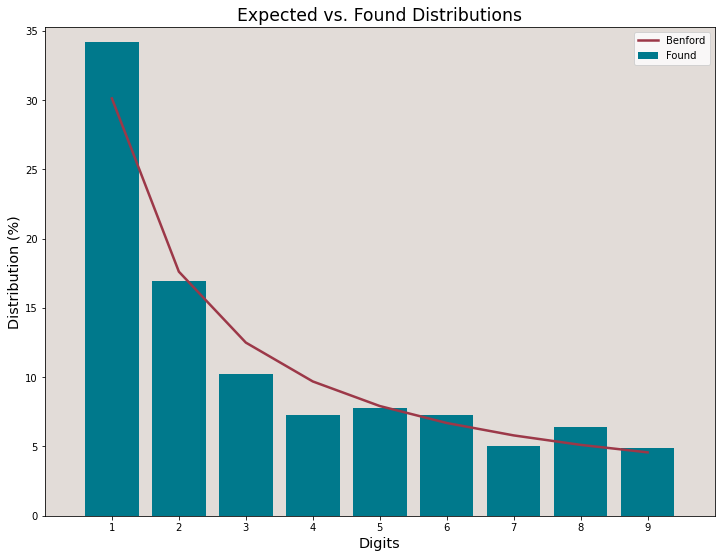

In [12]:
sp1 = pd.read_csv('perfil1.csv')
f1d = bf.first_digits(sp1.numero_seguidores1, digs=1, decimals=2)


Initialized sequence with 2368 registries.

Test performed on 2368 registries.
Discarded 0 records < 1 after preparation.


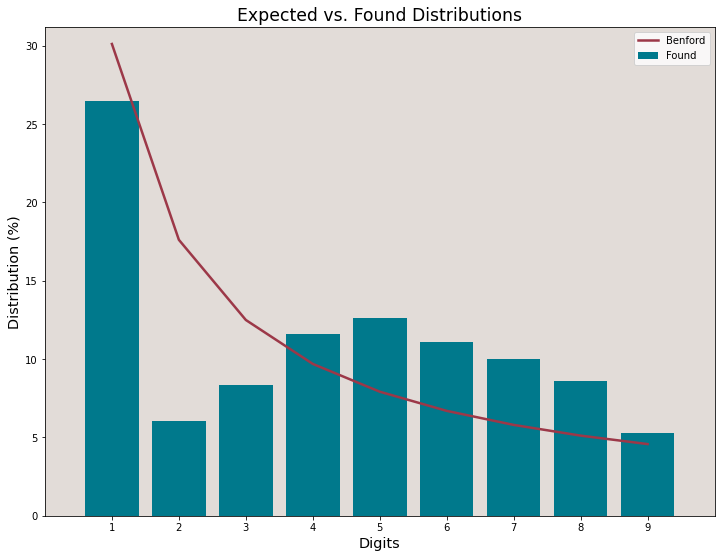

In [15]:
sp2 = pd.read_csv('perfil2.csv')
f1d = bf.first_digits(sp2.numero_seguidores2, digs=1, decimals=2)